In [1]:
import pandas as pd

# Step 1: Scraping

## Collect coke price data

In [2]:
coke_url = "https://www.numbeo.com/cost-of-living/prices_by_country.jsp?displayCurrency=USD&itemId=6"

In [3]:
tables = pd.read_html(coke_url)
coke_df = tables[1]
coke_df.head(2)

,Rank,Country,Coke/Pepsi (0.33 liter bottle)
0,NaN,Kazakhstan,0.64
1,NaN,Portugal,1.51


In [4]:
coke_df = coke_df.drop(columns='Rank')


In [5]:
coke_df = coke_df.rename(columns={'Country': "country", 'Coke/Pepsi (0.33 liter bottle)': "price"})
coke_df.head()

,country,price
0,Kazakhstan,0.64
1,Portugal,1.51
2,Greece,1.92
3,Latvia,1.28
4,Iran,0.91


## Collect salary data

In [6]:
salary_url = "https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=105"
salary_tables = pd.read_html(salary_url)
salary_df = salary_tables[1]
salary_df.head()

,0,1,2,3
0,1.0,Switzerland,NaN,"5,935.58 $"
1,2.0,Singapore,NaN,"5,009.32 $"
2,3.0,United States,NaN,"4,185.35 $"
3,4.0,Qatar,NaN,"3,977.93 $"
4,5.0,Iceland,NaN,"3,850.25 $"


In [7]:
salary_df = salary_df.drop(columns=[0,2])
salary_df = salary_df.rename(columns={1: "country", 3: "mo_salary"})
salary_df.head()

,country,mo_salary
0,Switzerland,"5,935.58 $"
1,Singapore,"5,009.32 $"
2,United States,"4,185.35 $"
3,Qatar,"3,977.93 $"
4,Iceland,"3,850.25 $"


# Step 2: Cleaning

## Cleaning country names

In [8]:
# Merging datasets
merged = pd.merge(coke_df, salary_df, how="left", on="country")
merged

,country,price,mo_salary
0,Kazakhstan,0.64,467.31 $
1,Portugal,1.51,"1,067.16 $"
2,Greece,1.92,881.98 $
3,Latvia,1.28,"1,025.95 $"
4,Iran,0.91,313.94 $
...,...,...,...
103,Denmark,3.47,"3,511.97 $"
104,Dominican Republic,0.92,369.87 $
105,Mexico,0.99,677.77 $
106,Montenegro,2.04,653.89 $


In [9]:
cleaned_df = merged.replace({'[$]':'',',':''},regex=True)

In [10]:
cleaned_df.head()

,country,price,mo_salary
0,Kazakhstan,0.64,467.31
1,Portugal,1.51,1067.16
2,Greece,1.92,881.98
3,Latvia,1.28,1025.95
4,Iran,0.91,313.94


In [11]:
cleaned_df['mo_salary']=cleaned_df['mo_salary'].astype(float)
cleaned_df['price']=cleaned_df['price'].astype(float)

In [12]:
cleaned_df['country'] = cleaned_df.country.str.replace(" [(]China[)]","").str.replace(" [(]Disputed Territory[)]","")
cleaned_df.sample(10)

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_73646/938645974.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_df['country'] = cleaned_df.country.str.replace(" [(]China[)]","").str.replace(" [(]Disputed Territory[)]","")


,country,price,mo_salary
10,Nepal,0.44,193.09
77,Albania,1.35,433.49
53,Israel,2.74,2632.57
9,Chile,1.34,680.73
76,Mauritius,1.02,501.54
39,Croatia,2.23,1039.08
4,Iran,0.91,313.94
97,Romania,1.46,776.97
59,Iceland,2.44,3850.25
36,Kuwait,0.54,2078.20


# Step 3: Data Analysis

In [27]:
cleaned_df['bottle_per_day'] = cleaned_df['mo_salary']/21/cleaned_df['price']
cleaned_df['bottle_per_day'] = cleaned_df['bottle_per_day'].round()
cleaned_df['daily_salary'] = cleaned_df['mo_salary']/21
cleaned_df['daily_salary'] = cleaned_df['daily_salary'].round(2)
cleaned_df.head()

,country,price,mo_salary,bottle_per_day,daily_salary
0,Kazakhstan,0.64,467.31,35.0,22.25
1,Portugal,1.51,1067.16,34.0,50.82
2,Greece,1.92,881.98,22.0,42.00
3,Latvia,1.28,1025.95,38.0,48.85
4,Iran,0.91,313.94,16.0,14.95


In [28]:
cleaned_df.sort_values(by=['bottle_per_day'], ascending=False).dropna().sample(10)

,country,price,mo_salary,bottle_per_day,daily_salary
5,Morocco,0.50,382.22,36.0,18.20
106,Montenegro,2.04,653.89,15.0,31.14
89,Pakistan,0.20,136.56,33.0,6.50
69,Colombia,0.62,296.78,23.0,14.13
30,Costa Rica,1.79,852.41,23.0,40.59
46,Palestine,0.87,711.55,39.0,33.88
33,Poland,1.33,1071.76,38.0,51.04
19,Finland,2.63,2773.65,50.0,132.08
72,Hungary,1.15,877.14,36.0,41.77
76,Mauritius,1.02,501.54,23.0,23.88


In [29]:
cleaned_df.to_csv("merged.csv",index=False)

<AxesSubplot: ylabel='country'>

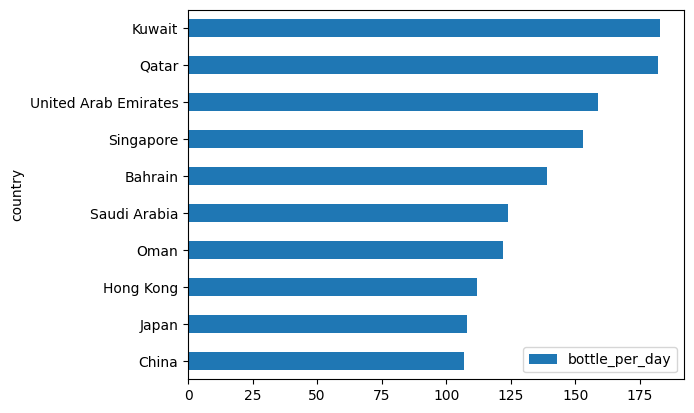

In [30]:
cleaned_df.sort_values(by='bottle_per_day').dropna().tail(10)\
    .plot(kind='barh',ylabel='country',y='bottle_per_day',x='country')

<AxesSubplot: xlabel='bottle_per_day', ylabel='mo_salary'>

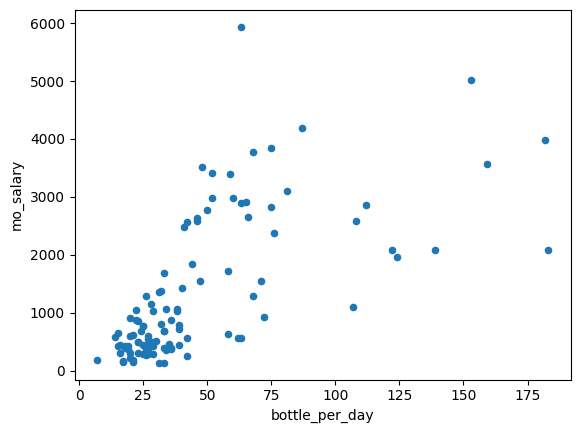

In [31]:
cleaned_df.plot(kind='scatter', y='mo_salary',x='bottle_per_day')

# Visualization

In [32]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [33]:
import altair as alt

In [20]:
bars = alt.Chart(cleaned_df).mark_bar().encode(x='bottle_per_day',y="country")

text = bars.mark_text(align='left',baseline='middle',dx=3)\
.encode(text='bottle_per_day')

(bars + text).properties(height=900)

/Users/tuxinyi/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [21]:
# TOP TEN COUNTRIES
bars= alt.Chart(cleaned_df).transform_window(
    rank='rank(bottle_per_day)',
    sort=[alt.SortField('bottle_per_day', order='descending')]
).transform_filter(
    alt.datum.rank <= 10
).mark_bar().encode(
    x='bottle_per_day',
    y=alt.Y('country',sort='-x'),color=alt.value('#fa253b'))

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3).encode(
    text='bottle_per_day',color=alt.value('#1E1E1E'))

bars + text


alt.LayerChart(...)

In [22]:
# TOP TEN COUNTRIES
bars_bottom= alt.Chart(cleaned_df).transform_window(
    rank='rank(bottle_per_day)',
    sort=[alt.SortField('bottle_per_day', order='ascending')]
).transform_filter(
    alt.datum.rank <= 10
).mark_bar().encode(
    x='bottle_per_day',
    y=alt.Y('country',sort='-x'),color=alt.value('#fa253b'))

text_bottom = bars_bottom.mark_text(
    align='left',
    baseline='middle',
    dx=3).encode(
    text='bottle_per_day',color=alt.value('#1E1E1E'))

bars_bottom + text_bottom

alt.LayerChart(...)

In [23]:
# alt.Chart(merged).mark_text(size=45, baseline='middle').encode(
#     alt.X('x:O', axis=None),
#     alt.Y('animal:O', axis=None),
#     alt.Row('country:N', header=alt.Header(title='')),
#     alt.Text('emoji:N')
# ).transform_calculate(
#     emoji="{'cattle': '🐄', 'pigs': '🐖', 'sheep': '🐏'}[datum.animal]"
# ).transform_window(
#     x='rank()',
#     groupby=['country', 'animal']
# ).properties(width=550, height=140)

In [24]:
%%R

library(ggplot2)

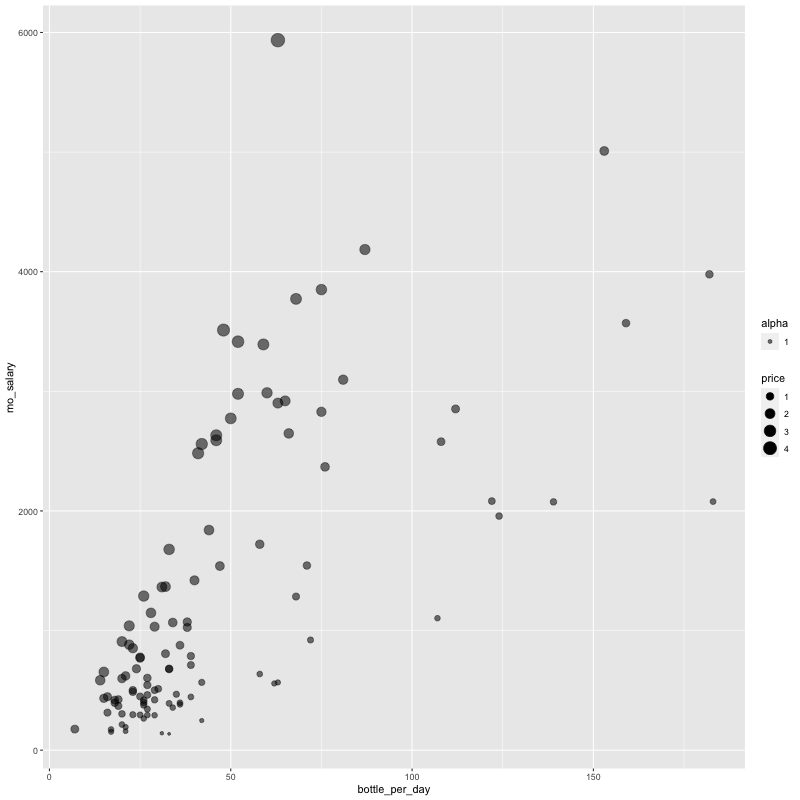

In [25]:
%%R -i cleaned_df -w 800 -h 800

ggplot(cleaned_df, aes(x=bottle_per_day, y=mo_salary)) + 
  geom_point(aes(size=price, alpha=1))